<a href="https://colab.research.google.com/github/Naandes/Dados-Financeiros-do-Sus/blob/main/modulo_1/aula_1/Outros_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação de bibliotecas**

Vamos importar agora todas as bibliotecas que serão usadas na aula 1 do módulo 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## **Importação e limpeza do DataFrame**

Vamos agoras importar o nosso DataFrame e deixar o melhor possível para as análises posteriores

### **Importação do DataFrame**

O DataFrame que estamos pegando é do DATASUS, uma fonte de dados do governo sobre a saúde pública. Mais específico, ele é referente sobre o valor gasto com internações por estado de acordo que foi processado a internação, na faixa de tempo de Janeiro de 2008 até Março de 2021.

In [4]:
##Importando DataFrame
uri = r"/content/A065709189_28_143_208.csv"
df = pd.read_csv(uri, encoding='ISO-8859-1',skiprows = 3, sep = ';', skipfooter = 12, thousands='.', decimal=',')
df.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of       Unidade da Federação  1992/Mar  ...      2021/Mar         Total
0              11 Rondônia         -  ...  4.732441e+06  9.964113e+08
1                  12 Acre         -  ...  1.137342e+06  4.500485e+08
2              13 Amazonas         -  ...  6.799061e+06  1.917248e+09
3               14 Roraima         -  ...  2.381844e+06  3.288770e+08
4                  15 Pará         -  ...  1.306956e+07  4.705309e+09
5                 16 Amapá         -  ...  9.891554e+05  3.098601e+08
6             17 Tocantins         -  ...  9.287568e+05  1.020028e+09
7              21 Maranhão         -  ...  1.729451e+07  3.871069e+09
8                 22 Piauí         -  ...  9.542152e+06  2.280889e+09
9                 23 Ceará         -  ...  1.717315e+07  6.591837e+09
10  24 Rio Grande do Norte         -  ...  8.733455e+06  2.660122e+09
11              25 Paraíba         -  ...  1.251789e+07  2.614919e+09
12           26 Pernambuco         -  ...  3.947274e+07  8.5

### **Tratando o dataframe**

Vamos renomear as colunas dos estados do Brasil mais o distríto federal com suas abreviações.

#### **Renomeando alguns nomes**

In [5]:
df["Unidade da Federação"].unique() #Facilitar para copiar os nomes únicos da coluna

array(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco',
       '27 Alagoas', '28 Sergipe', '29 Bahia', '31 Minas Gerais',
       '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo',
       '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul',
       '50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás',
       '53 Distrito Federal'], dtype=object)

In [6]:
maps = {'11 Rondônia' : 'RO' , 
        '12 Acre' : 'AC',
        '13 Amazonas' : 'AM',
        '14 Roraima' : 'RR',
        '15 Pará' : 'PA',
       '16 Amapá' : 'AP',
        '17 Tocantins' : 'TO',
        '21 Maranhão' : 'MA',
        '22 Piauí' : 'PI', 
        '23 Ceará' : 'CE',
       '24 Rio Grande do Norte' : 'RN',
        '25 Paraíba' : 'PB',
        '26 Pernambuco' :'PE',
       '27 Alagoas' : 'AL',
        '28 Sergipe' : 'SE', 
        '29 Bahia' : 'BA', 
        '31 Minas Gerais' : 'MG',
       '32 Espírito Santo' : 'ES', 
        '33 Rio de Janeiro' : 'RJ', 
        '35 São Paulo' : 'SP',
       '41 Paraná' : 'PR', 
        '42 Santa Catarina' : 'SC', 
        '43 Rio Grande do Sul' : 'RS',
       '50 Mato Grosso do Sul' : 'MS', 
        '51 Mato Grosso' : 'MT', 
        '52 Goiás' : 'GO',
       '53 Distrito Federal' : 'DF'}

In [7]:
df.rename(columns={'Unidade da Federação': 'UF'}, inplace=True) #Trocando nome de Unidade da Federação para UF
df['UF'] = df.replace({'UF': maps}) #Trocando os nomes dos estados pelas abreviações
df


,UF,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,RO,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.327666e+06,8.431335e+06,7.251287e+06,7.490441e+06,8.957706e+06,1.099333e+07,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06,9.964113e+08
1,AC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.276791e+06,2.985764e+06,2.939675e+06,2.672857e+06,2.940828e+06,3.914824e+06,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06,4.500485e+08
2,AM,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496582e+07,1.598235e+07,1.516647e+07,1.481596e+07,1.637939e+07,1.962533e+07,1.843306e+07,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06,1.917248e+09
3,RR,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2.740952e+06,2.478349e+06,2.674959e+06,2.721261e+06,2.844812e+06,2.967161e+06,2.841588e+06,3.328231e+06,2.878691e+06,2.964324e+06,2.524712e+06,2.462452e+06,2.662240e+06,2.499996e+06,2.846136e+06,2.789823e+06,2.839390e+06,2.647540e+06,2.865778e+06,3.181322e+06,3.070437e+06,3.162342e+06,3.121105e+06,2.889970e+06,3.084561e+06,2.967159e+06,2.813954e+06,2.306120e+06,2.921522e+06,3.300013e+06,3.192075e+06,3.262354e+06,2.978629e+06,3.313297e+06,3.527263e+06,3.125022e+06,3.209324e+06,3.044799e+06,2.381844e+06,3.288770e+08
4,PA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3.361584e+07,3.062349e+07,3.412193e+07,3.503995e+07,3.542461e+07,3.416028e+07,3.448495e+07,3.561836e+07,3.438092e+07,3.844109e+07,3.358354e+07,3.278935e+07,3.451353e+07,3.188592e+07,3.323616e+07,3.100892e+07,3.106411e+07,2.854318e+07,3.671393e+07,3.646201e+07,3.679295e+07,3.698431e+07,3.557925e+07,3.524766e+07,3.704635e+07,3.468334e+07,3.490842e+07,2.918469e+07,4.332773e+07,4.099455e+07,4.049635e+07,3.879339e+07,3.696595e+07,3.840662e+07,3.704303e+07,3.691444e+07,3.388777e+07,2.334322e+07,1.306956e+07,4.705309e+09
5,AP,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1.888217e+06,1.756846e+06,1.869746e+06,2.009211e+06,2.092229e+06,2.047927e+06,2.260211e+06,2.408659e+06,2.369224e+06,2.588154e+06,2.298458e+06,2.356799e+06,2.4413

Vamos analisar agora que tipo de dados o dataframe possui.

#### **Dados Faltantes**

In [8]:
df.isnull().sum().sort_values(ascending=False)[:10]

Total       0
2005/Jul    0
2005/Jan    0
2005/Fev    0
2005/Mar    0
2005/Abr    0
2005/Mai    0
2005/Jun    0
2005/Ago    0
2004/Nov    0
dtype: int64

`Peguei as 10 colunas que provavelmente teriam os maiores números de valores nulos e em nenhum possui dados nulos. Agora vamos analisar como estão comportados as colunas do DataFrame`

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 287 columns):
 #   Column    Dtype  
---  ------    -----  
 0   UF        object 
 1   1992/Mar  object 
 2   1992/Abr  object 
 3   1993/Mai  object 
 4   1993/Dez  object 
 5   1994/Jan  object 
 6   1994/Fev  object 
 7   1994/Mai  object 
 8   1994/Ago  object 
 9   1994/Nov  object 
 10  1995/Jan  object 
 11  1995/Mar  object 
 12  1995/Jun  object 
 13  1995/Ago  object 
 14  1995/Dez  object 
 15  1996/Fev  object 
 16  1996/Mar  object 
 17  1996/Ago  object 
 18  1996/Dez  object 
 19  1997/Fev  object 
 20  1997/Nov  object 
 21  1998/Fev  object 
 22  1998/Mar  object 
 23  1998/Jul  object 
 24  1998/Ago  object 
 25  1998/Set  object 
 26  1998/Out  object 
 27  1998/Dez  object 
 28  1999/Fev  object 
 29  1999/Mar  object 
 30  1999/Mai  object 
 31  1999/Jul  object 
 32  1999/Ago  object 
 33  1999/Set  object 
 34  1999/Out  object 
 35  1999/Nov  object 
 36  1999/Dez  object 

`Podemos perceber que a partir da coluna '1992/Mar' até '2007/Jun' são do tipo 'object'. Vamos olhar os valores únicos da coluna '2007/Jun'.`



In [10]:
print('Valores únicos da coluna [20007/Jul]: \n')
print(df['2007/Jul'].unique())

Valores únicos da coluna [20007/Jul]: 

['-' '212.75' '9487.90' '12695.61' '586.69' '42360.79' '12172.72'
 '3698.69' '2147.54' '2926.77' '137994.96' '9919.07' '3419.97' '16657.31'
 '90760.11' '7179.52' '80054.83' '367978.67' '143586.15' '107403.78'
 '100916.50' '9722.90' '4573.77' '7673.55' '104654.16']


`Podemos perceber que entre os dados possui o valor '-'.`



Como temos muitas colunas com dados faltantes, vamos selecionar apenas colunas que possuem todos os dados como numéricos:

In [11]:
colunas_completas = df.mean().index.tolist()
colunas_completas.insert(0, "UF")
colunas_completas

['UF',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '201

In [12]:
usaveis = df[colunas_completas]
usaveis = usaveis.set_index("UF")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RO,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.327666e+06,8.431335e+06,7.251287e+06,7.490441e+06,8.957706e+06,1.099333e+07,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06,9.964113e+08
AC,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.276791e+06,2.985764e+06,2.939675e+06,2.672857e+06,2.940828e+06,3.914824e+06,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06,4.500485e+08
AM,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496582e+07,1.598235e+07,1.516647e+07,1.481596e+07,1.637939e+07,1.962533e+07,1.843306e+07,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06,1.917248e+09
RR,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.716878e+05,8.760912e+05,8.969525e+05,1.0

##**Gráficos**

Vamos criar um histograma com o total gasto por estados.

In [13]:
usaveis = usaveis.drop('Total', axis=1)

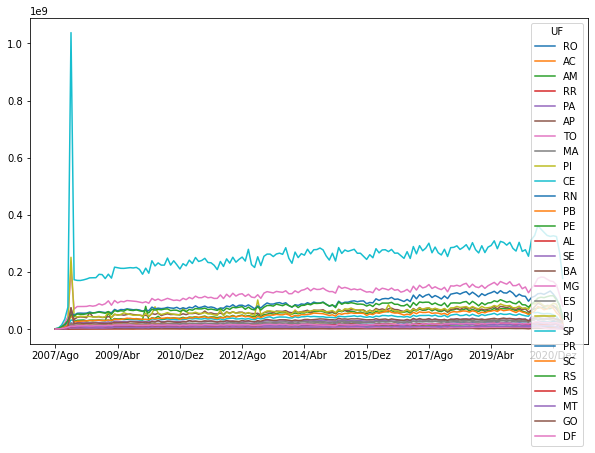

In [14]:
usaveis.T.plot(figsize = (10,6))

**Para melhor análise, vamos analisar região por região:**

### **Região Norte**

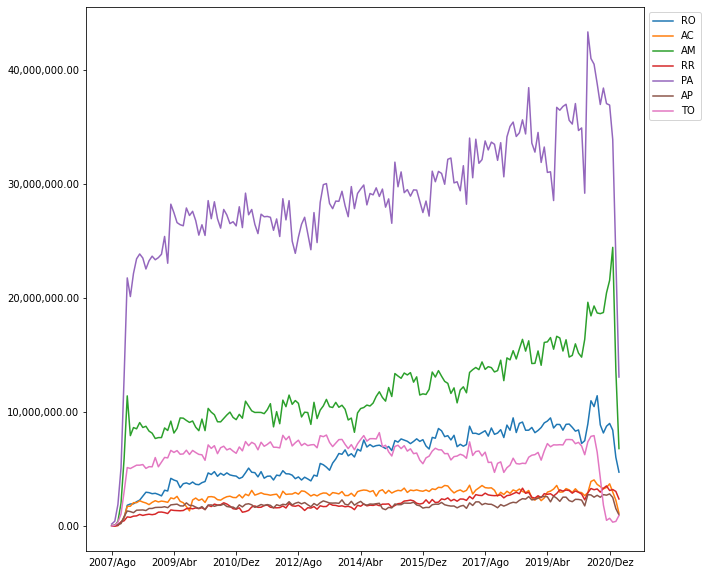

In [15]:
media_norte = pd.DataFrame(usaveis[0:7].mean())
media_norte = media_norte.T
usaveis = pd.concat([usaveis, media_norte])
usaveis = usaveis.rename(index={0: 'Media_Norte'})
ax = usaveis[0:7].T.plot(figsize = (10,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" +' R$'))
plt.legend(bbox_to_anchor=(1,1)) 
plt.title("Valores gasto na Região Norte")

É possível perceber que o Pará ao longo do tempo possui um gasto maior dentro da região Norte do Brasil.


###**Região Nordeste**

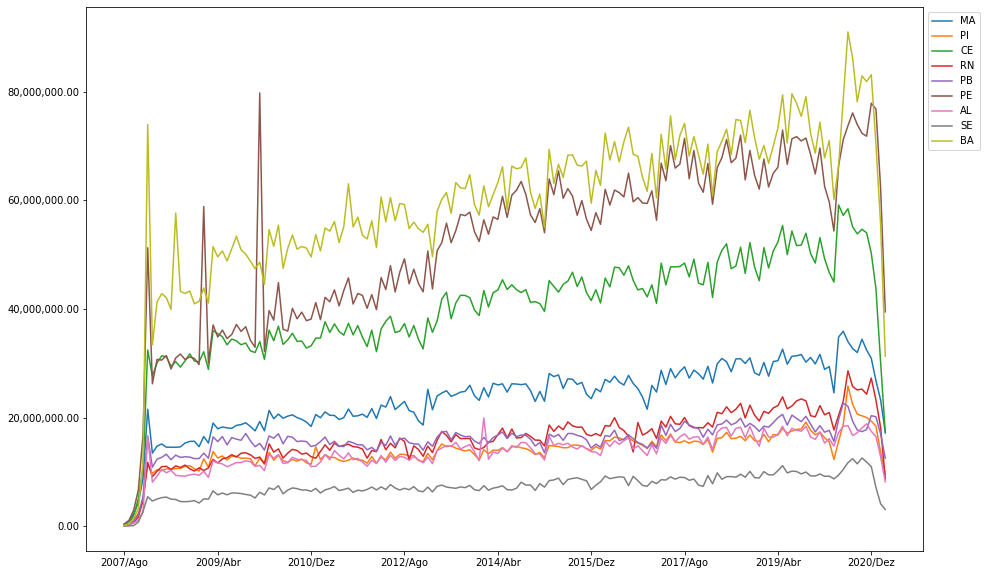

In [23]:
media_nordeste = pd.DataFrame(usaveis[7:16].mean())
media_nordeste = media_nordeste.T
usaveis = pd.concat([usaveis, media_nordeste])
usaveis = usaveis.rename(index={0: 'Media_Nordeste'})
ax = usaveis[7:16].T.plot(figsize = (15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + ' R$'))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Valores gasto na Região Nordeste")


É possível perceber que Bahia e Pernambuco alteram o posto de maior gasto da região, enquanto Sergipe se manteve em último em todas as análises.

###**Região Sudeste**

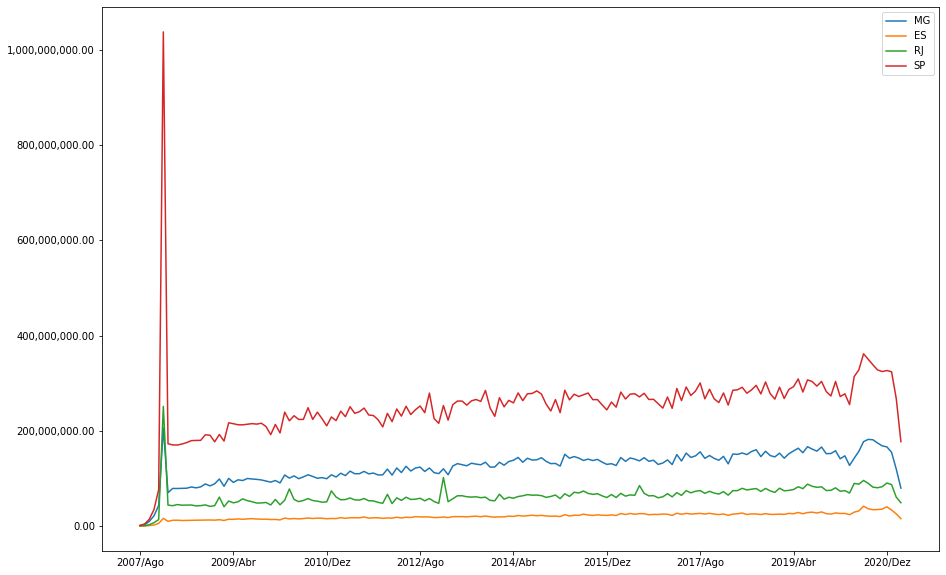

In [27]:
media_sudeste = pd.DataFrame(usaveis[16:20].mean())
media_sudeste = media_sudeste.T
usaveis = pd.concat([usaveis, media_sudeste])
usaveis = usaveis.rename(index={0: 'Media_Sudeste'})
ax = usaveis[16:20].T.plot(figsize = (15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" +" R$"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Valores gasto na Região Sudeste")


São Paulo como se esperaa possui em todas as análises o posto com maior gasto, tendo como destaque o mês de Agosto de 2007, sendo um mês atípico com um valor absurdo de gasto.

###**Região Sul**

Text(0.5, 1.0, 'Valores gasto na Região Sul')

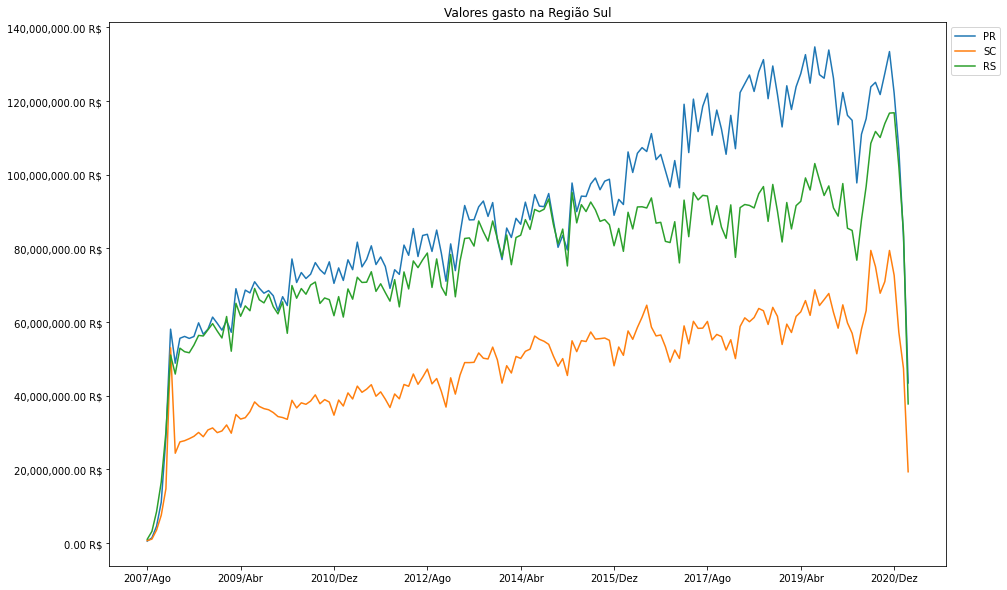

In [31]:
media_sul = pd.DataFrame(usaveis[20:23].mean())
media_sul = media_sul.T
usaveis = pd.concat([usaveis, media_sul])
usaveis = usaveis.rename(index={0: 'Media_Sul'})
ax = usaveis[20:23].T.plot(figsize = (15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + " R$"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Valores gasto na Região Sul")

Paraná e Santa Catarina alteram o primeiro lugar de gastos, ficando muito parecidos ao longo do tempo.

###**Região Centro-Oeste**

Text(0.5, 1.0, 'Valores gasto na Região Centro-Oeste')

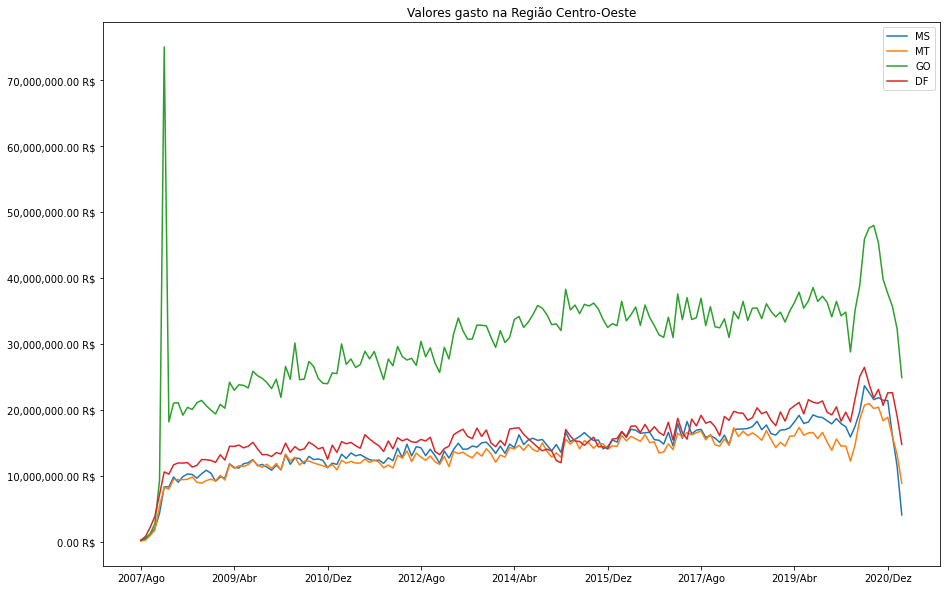

In [30]:
media_centro_oeste = pd.DataFrame(usaveis[23:27].mean())
media_centro_oeste = media_centro_oeste.T
usaveis = pd.concat([usaveis, media_centro_oeste])
usaveis = usaveis.rename(index={0: 'Media_Centro_Oeste'})
ax = usaveis[23:27].T.plot(figsize = (15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"+ " R$"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Valores gasto na Região Centro-Oeste")

Goiás assim como São Paulo teve um pico em Agosto de 2007 e se manteve também como líder de gastos ao longo do tempo.

###**Análise por Região**

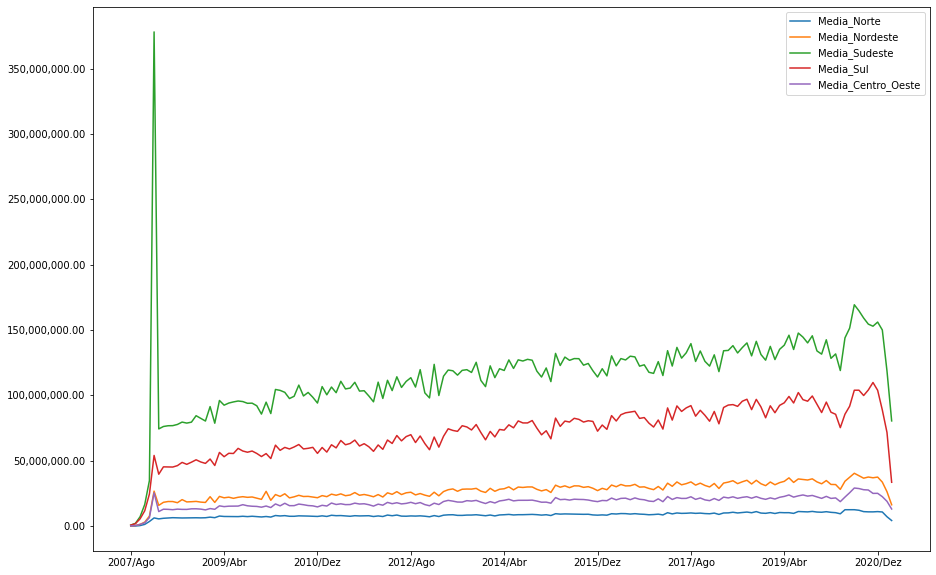

In [24]:
ax = usaveis[27:32].T.plot(figsize = (15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title('Valor médio gasto por Região')

As médias se mantiveram proporcionais com o tempo e temos um elevado número em Agosto de 2007 por parte da região Sudeste por causa do gasto anormal que São Paulo obteve naquele mês.